In [1]:
import numpy as np
import pandas as pd
import requests
from rates_processing import *
from cds_processing import *
import config
from pathlib import Path

OUTPUT_DIR = Path(config.OUTPUT_DIR)
DATA_DIR = Path(config.DATA_DIR)

In [23]:
def calc_cds_return(method):
    start_date = '2001-01-02'
    end_date = '2024-01-31'
    loss_given_default =0.6
    quarterly_discount = calc_discount(start_date, end_date)
    cds_spread = process_cds_monthly(method)
    cds_spread = cds_spread.set_index('Date')
    lambda_df = 4 * np.log(1+(cds_spread/(4*loss_given_default)))
    quarters = range(1, 21)  # 1 to 20 quarters
    risky_duration = pd.DataFrame(index=lambda_df.index, columns=lambda_df.columns)
    for col in lambda_df.columns:
        quarterly_survival_probability = pd.DataFrame(index=lambda_df.index, columns=quarters)
        for quarter in quarters:
            quarterly_survival_probability[quarter] = np.exp(-((quarter * lambda_df[col]) / 4))
        temp_df = quarterly_survival_probability * quarterly_discount
        risky_duration[col] = 0.25 * temp_df.sum(axis=1)
    risky_duration_shifted = risky_duration.shift(1)
    cds_spread_shifted = cds_spread.shift(1)
    cds_spread_change = cds_spread.diff()
    cds_return = ((cds_spread_shifted/12) + (cds_spread_change * risky_duration_shifted))
    return cds_return

In [22]:
cds_return = calc_cds_return('mean')
cds_return

/Users/Nidhi/Documents/GitHub/P15_DANK/src/interest_rates.py:65: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  processed_df.index = pd.to_datetime(processed_df.index)


here
here


,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.000208,0.000279,0.000333,0.000363,0.000434,0.000466,0.000507,0.000555,0.000607,0.000678,0.000749,0.000840,0.000929,0.001044,0.001179,0.001346,0.001563,0.002073,0.002742,NaN
2001-03-31,0.000201,0.000263,0.000331,0.000365,0.000430,0.000477,0.000512,0.000570,0.000643,0.000719,0.000803,0.000883,0.000976,0.001199,0.001311,0.001431,0.001581,0.002086,0.003100,NaN
2001-04-30,0.000200,0.000265,0.000316,0.000347,0.000397,0.000453,0.000512,0.000582,0.000646,0.000693,0.000756,0.000827,0.000916,0.001025,0.001222,0.001405,0.001551,0.001889,0.002565,NaN
2001-05-31,0.000200,0.000265,0.000312,0.000345,0.000385,0.000429,0.000490,0.000590,0.000642,0.000687,0.000749,0.000806,0.000885,0.001098,0.001235,0.001444,0.001768,0.002163,0.002827,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.000154,0.000241,0.000308,0.000359,0.000403,0.000452,0.000516,0.000574,0.000625,0.000689,0.000760,0.000832,0.000959,0.001137,0.001386,0.001660,0.002054,0.002598,0.003700,0.016424
2023-09-30,0.000150,0.000235,0.000309,0.000356,0.000399,0.000447,0.000512,0.000566,0.000625,0.000685,0.000752,0.000832,0.000969,0.001158,0.001387,0.001649,0.002039,0.002610,0.003732,0.015805
2023-10-31,0.000155,0.000252,0.000323,0.000378,0.000426,0.000481,0.000536,0.000604,0.000665,0.000733,0.000809,0.000884,0.001001,0.001243,0.001482,0.001763,0.002174,0.002824,0.003992,0.015805


In [11]:
actual_return = pd.read_csv('~/Documents/GitHub/P15_DANK/data/manual/He_Kelly_Manela_Factors_And_Test_Assets_monthly.csv')
actual_return = actual_return[['yyyymm','CDS_01','CDS_02','CDS_03','CDS_04','CDS_05','CDS_06','CDS_07','CDS_08','CDS_09','CDS_10','CDS_11','CDS_12','CDS_13','CDS_14','CDS_15','CDS_16','CDS_17','CDS_18','CDS_19','CDS_20']]
actual_return = actual_return.dropna(axis=0)

In [12]:
actual_return
actual_return= actual_return.reindex(cds_return.index)

,yyyymm,CDS_01,CDS_02,CDS_03,CDS_04,CDS_05,CDS_06,CDS_07,CDS_08,CDS_09,...,CDS_11,CDS_12,CDS_13,CDS_14,CDS_15,CDS_16,CDS_17,CDS_18,CDS_19,CDS_20
373,200102.0,0.0039,0.0040,0.0033,0.0024,0.0093,0.0030,0.0020,0.0048,0.0044,...,0.0078,-0.0036,0.0042,0.0057,0.0027,-0.0153,-0.0032,0.0070,0.0005,0.0193
374,200103.0,0.0012,0.0041,0.0061,0.0045,0.0073,0.0059,0.0079,0.0071,0.0087,...,0.0060,0.0042,0.0032,0.0068,-0.0012,0.0093,0.0083,-0.0012,0.0072,0.0219
375,200104.0,0.0033,0.0044,0.0044,0.0060,0.0054,0.0037,0.0044,0.0044,0.0068,...,0.0098,0.0106,0.0084,0.0098,0.0083,0.0124,0.0061,0.0109,0.0041,-0.0018
376,200105.0,0.0038,0.0043,0.0045,0.0039,0.0044,0.0039,0.0040,0.0075,0.0045,...,0.0076,0.0078,0.0049,0.0117,0.0108,0.0061,0.0150,0.0152,0.0184,0.0140
377,200106.0,0.0030,0.0027,0.0044,0.0037,0.0079,0.0042,0.0053,0.0035,0.0040,...,0.0031,0.0029,0.0038,0.0045,0.0034,0.0044,0.0020,0.0073,0.0065,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,201208.0,0.0005,0.0009,0.0013,0.0011,0.0022,0.0022,0.0024,0.0017,0.0015,...,0.0031,0.0015,0.0035,0.0032,0.0043,0.0062,0.0084,0.0060,0.0051,0.0152
512,201209.0,0.0012,0.0010,0.0020,0.0022,0.0030,0.0023,0.0030,0.0033,0.0039,...,0.0049,0.0059,0.0057,0.0087,0.0070,0.0083,0.0092,0.0120,0.0119,0.0174
513,201210.0,0.0010,0.0009,0.0009,0.0016,0.0018,0.0019,0.0014,0.0010,0.0019,...,0.0008,0.0028,0.0043,0.0042,0.0013,0.0045,0.0033,0.0028,-0.0010,0.0045
514,201211.0,-0.0006,-0.0007,-0.0009,-0.0007,-0.0010,-0.0010,-0.0009,-0.0016,-0.0016,...,-0.0037,-0.0005,-0.0012,0.0005,0.0015,-0.0002,0.0026,0.0027,0.0107,0.0015


<Axes: xlabel='Date'>

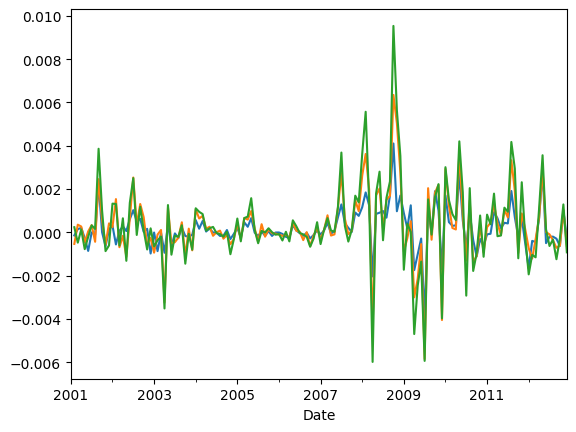

In [18]:
cds_return_paper = return_mean[return_mean.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: xlabel='Date'>

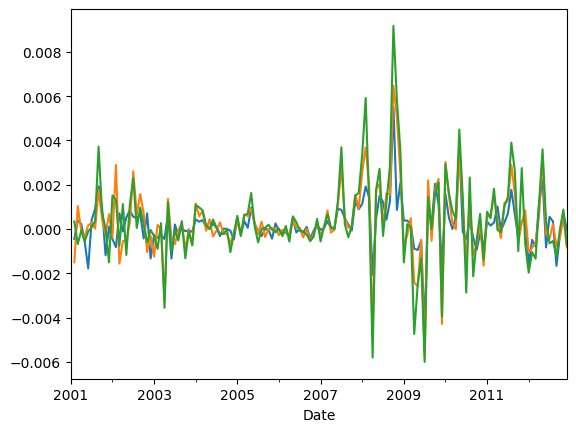

In [19]:
cds_return_paper = return_median[return_median.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: xlabel='Date'>

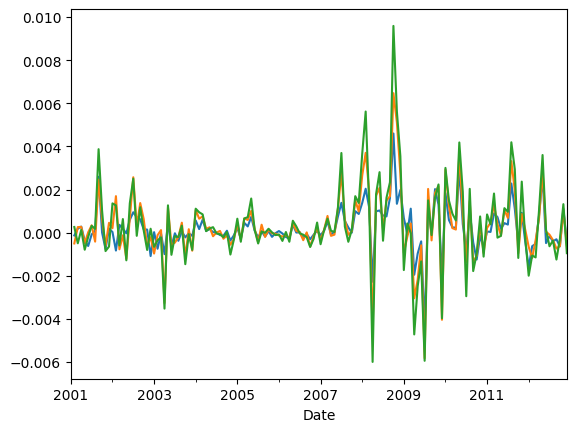

In [26]:
cds_return_paper = return_wt[return_wt.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: xlabel='Date'>

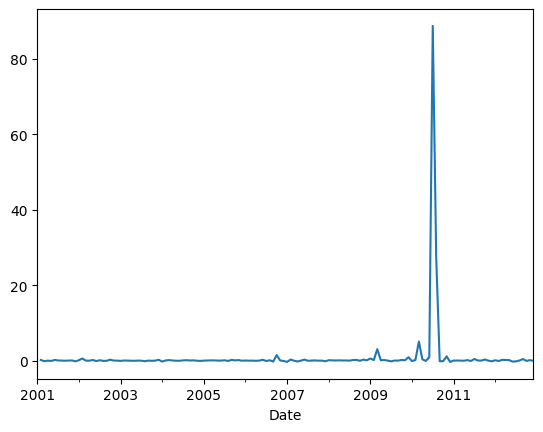

In [29]:
cds_return_paper['cds_20'].plot()

<Axes: >

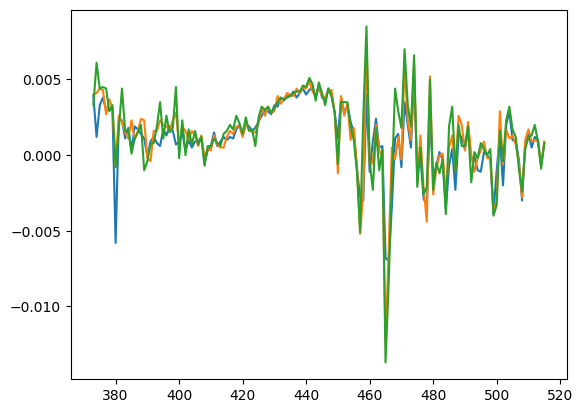

In [21]:
actual_return['CDS_01'].plot()
actual_return['CDS_02'].plot()
actual_return['CDS_03'].plot()

<Axes: >

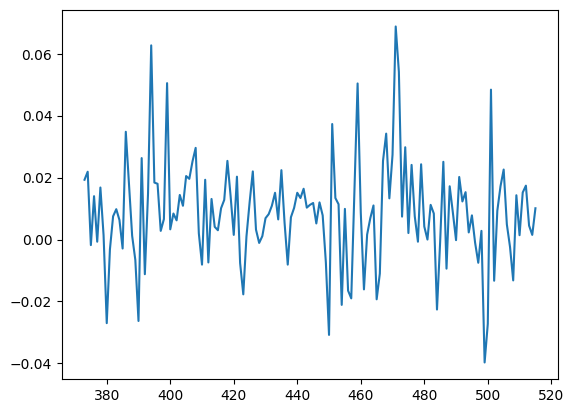

In [25]:
actual_return['CDS_20'].plot()